In [46]:
import pandas as pd 
import seaborn as sns 


In [47]:
air = pd.read_csv("/content/drive/MyDrive/Colab Notebooks/Assignment2/AirQuality_Data.csv")

In [48]:
air.head()

,No,year,month,day,hour,PM2.5,PM10,SO2,NO2,CO,O3,TEMP,PRES,DEWP,RAIN,wd,WSPM,station
0,1,2013,3,1,0,9.0,9.0,3.0,17.0,300.0,89.0,-0.5,1024.5,-21.4,0.0,NNW,5.7,Dongsi
1,2,2013,3,1,1,4.0,4.0,3.0,16.0,300.0,88.0,-0.7,1025.1,-22.1,0.0,NW,3.9,Dongsi
2,3,2013,3,1,2,7.0,7.0,NaN,17.0,300.0,60.0,-1.2,1025.3,-24.6,0.0,NNW,5.3,Dongsi
3,4,2013,3,1,3,3.0,3.0,5.0,18.0,NaN,NaN,-1.4,1026.2,-25.5,0.0,N,4.9,Dongsi
4,5,2013,3,1,4,3.0,3.0,7.0,NaN,200.0,84.0,-1.9,1027.1,-24.5,0.0,NNW,3.2,Dongsi


In [49]:
air=air.drop(['No'],axis=1)

In [50]:
air.isnull().sum()

year          0
month         0
day           0
hour          0
PM2.5       750
PM10        553
SO2         663
NO2        1601
CO         3197
O3          664
TEMP         20
PRES         20
DEWP         20
RAIN         20
wd           78
WSPM         14
station       0
dtype: int64

# Checking distribution of the PM2.5 column

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


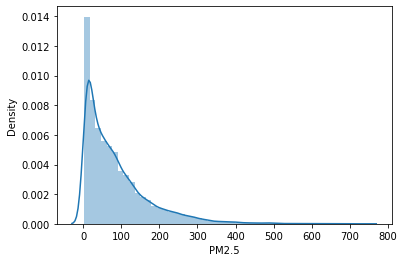

In [51]:
sns.distplot(air['PM2.5'])

# Filling null values

In [52]:
air.fillna(air.mean().round(1), inplace=True)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  """Entry point for launching an IPython kernel.


In [53]:
air.isnull().sum()

year        0
month       0
day         0
hour        0
PM2.5       0
PM10        0
SO2         0
NO2         0
CO          0
O3          0
TEMP        0
PRES        0
DEWP        0
RAIN        0
wd         78
WSPM        0
station     0
dtype: int64

In [54]:
air.columns

Index(['year', 'month', 'day', 'hour', 'PM2.5', 'PM10', 'SO2', 'NO2', 'CO',
       'O3', 'TEMP', 'PRES', 'DEWP', 'RAIN', 'wd', 'WSPM', 'station'],
      dtype='object')

# Aquiring dummy variables

In [55]:
air = pd.get_dummies(air[['year', 'month', 'day', 'hour', 'PM2.5', 'PM10', 'SO2', 'NO2', 'CO',
       'O3', 'TEMP', 'PRES', 'DEWP', 'RAIN', 'wd', 'WSPM', 'station']])

In [56]:
air

,year,month,day,hour,PM2.5,PM10,SO2,NO2,CO,O3,...,wd_NW,wd_S,wd_SE,wd_SSE,wd_SSW,wd_SW,wd_W,wd_WNW,wd_WSW,station_Dongsi
0,2013,3,1,0,9.0,9.0,3.0,17.0,300.0,89.0,...,0,0,0,0,0,0,0,0,0,1
1,2013,3,1,1,4.0,4.0,3.0,16.0,300.0,88.0,...,1,0,0,0,0,0,0,0,0,1
2,2013,3,1,2,7.0,7.0,18.5,17.0,300.0,60.0,...,0,0,0,0,0,0,0,0,0,1
3,2013,3,1,3,3.0,3.0,5.0,18.0,1330.1,57.2,...,0,0,0,0,0,0,0,0,0,1
4,2013,3,1,4,3.0,3.0,7.0,53.7,200.0,84.0,...,0,0,0,0,0,0,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
35059,2017,2,28,19,16.0,51.0,3.0,29.0,400.0,73.0,...,1,0,0,0,0,0,0,0,0,1
35060,2017,2,28,20,18.0,45.0,3.0,43.0,500.0,54.0,...,0,0,0,0,0,0,0,1,0,1
35061,2017,2,28,21,23.0,58.0,5.0,61.0,700.0,28.0,...,1,0,0,0,0,0,0,0,0,1
35062,2017,2,28,22,23.0,53.0,9.0,75.0,900.0,15.0,...,0,0,0,0,0,0,0,0,0,1


In [57]:
X = air.drop(['PM2.5'],axis=1)
y = air['PM2.5']

# Train-Test Splitting

In [58]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=.2,random_state=42)

# Linear Regression

In [59]:
from sklearn.linear_model import LinearRegression
regressor = LinearRegression()
Linear_regressor_model=regressor.fit(X_train,y_train)


In [60]:
Linear_regressor_model.score(X_train,y_train)

0.8552285440312235

In [61]:
Linear_regressor_model.score(X_test,y_test)

0.8574938272251159

# Stochastic Gradient Descent

In [62]:
y_pred=regressor.predict(X_test)

In [63]:
from sklearn.metrics import mean_squared_error 
MSE=mean_squared_error(y_true=y_test, y_pred=y_pred, squared=True)
print(MSE)

990.6110862134432


### Making a pipeline 

In [64]:
from sklearn.linear_model import SGDRegressor
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import StandardScaler

In [65]:
reg= make_pipeline(StandardScaler(), SGDRegressor(max_iter=1000,tol=1e-3,eta0=.05))
reg.fit(X_train,y_train)

Pipeline(steps=[('standardscaler', StandardScaler()),
                ('sgdregressor', SGDRegressor(eta0=0.05))])

In [66]:
y_pred_SGD=reg.predict(X_test)
RMSE=mean_squared_error(y_true=y_test,y_pred=y_pred_SGD, squared=False)
print(RMSE)


32.35746967538571


# Ridge Model

In [67]:
from sklearn.linear_model import Ridge 
Ridge_model=Ridge(alpha=2, max_iter=1000,tol=.5) 
Ridge_model.fit(X_train,y_train)

Ridge(alpha=2, max_iter=1000, tol=0.5)

In [68]:
Ridge_model.score(X_train,y_train)

0.8552259648492133

In [69]:
Ridge_model.score(X_test,y_test)

0.8574931539962203

# Lasso Model

In [70]:
from sklearn.linear_model import Lasso
Lasso_model=Lasso(alpha=100,max_iter=1000, tol=.5)
Lasso_model.fit(X_train,y_train)

Lasso(alpha=100, tol=0.5)

In [71]:
Lasso_model.score(X_train,y_train)

0.8319097950592317

In [72]:
Lasso_model.score(X_test,y_test)

0.8369199445937053

# ElasticNet Model

In [73]:
from sklearn.linear_model import ElasticNet 
ElasticNet_model = ElasticNet(alpha=.01, l1_ratio=.5)
ElasticNet_model.fit(X_train,y_train)

ElasticNet(alpha=0.01)

In [74]:
ElasticNet_model.score(X_train,y_train)

0.855202915646177

In [75]:
ElasticNet_model.score(X_test,y_test)

0.8575026631516038

# Making Pretty Table

In [81]:
from prettytable import PrettyTable
myTable = PrettyTable(['Model','Training_score',"Test_score"])
RMSEtable = PrettyTable(['Model','RMSE'])

In [82]:
myTable.add_row(['Linear Regression',Linear_regressor_model.score(X_train,y_train),Linear_regressor_model.score(X_test,y_test)])
myTable.add_row(['Ridge',Ridge_model.score(X_train,y_train),Ridge_model.score(X_test,y_test)])
myTable.add_row(['Lasso',Lasso_model.score(X_train,y_train),Lasso_model.score(X_test,y_test)])
myTable.add_row(['Elastic Net',ElasticNet_model.score(X_train,y_train),ElasticNet_model.score(X_test,y_test)])
RMSEtable.add_row(['Stochastic Gradient Descent', RMSE])



In [83]:
print(myTable)

+-------------------+--------------------+--------------------+
|       Model       |   Training_score   |     Test_score     |
+-------------------+--------------------+--------------------+
| Linear Regression | 0.8552285440312235 | 0.8574938272251159 |
|       Ridge       | 0.8552259648492133 | 0.8574931539962203 |
|       Lasso       | 0.8319097950592317 | 0.8369199445937053 |
|    Elastic Net    | 0.855202915646177  | 0.8575026631516038 |
+-------------------+--------------------+--------------------+


In [84]:
print(RMSEtable)

+-----------------------------+-------------------+
|            Model            |        RMSE       |
+-----------------------------+-------------------+
| Stochastic Gradient Descent | 32.35746967538571 |
+-----------------------------+-------------------+


In [85]:
# From these results, when picking a model, it may be a good idea to go with the Elastic Net model, as it has the best test score than the other models